# Gather

- using given twitter-archive-enhanced.csv
- dowloading image-predictions.tsv using requests
- using tweet_json.txt results becouse of auth issues with tweepy api

In [1]:
import pandas as pd

In [2]:
Df1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
Df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
Df1['text'].head(6)

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
5    Here we have a majestic great white breaching ...
Name: text, dtype: object

In [5]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [6]:
Df2=pd.read_csv('image-predictions.tsv',sep='\t')  

In [7]:
Df2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
import json
df=[]
with open(r'tweets.txt') as f:
    for line in f:
        b=json.loads(line)
        df.append({'tweet_id':b['id'],'retweet_count':b['retweet_count'],'favorite_count':b['favorite_count']})
Df3=pd.DataFrame(df)       

In [9]:
Df3.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [10]:
Df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
Df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
Df1['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Buddy          7
Toby           7
an             7
Bailey         7
Leo            6
Milo           6
Jack           6
Koda           6
Jax            6
Dave           6
Oscar          6
Rusty          6
Scout          6
Bella          6
Stanley        6
Oakley         5
            ... 
Yoda           1
Eazy           1
Tilly          1
Godzilla       1
Jaycob         1
Mookie         1
Bert           1
Stefan         1
Burt           1
Ralf           1
Brooks         1
Ricky          1
Lambeau        1
Kial           1
Alexander      1
Edmund         1
Vinscent       1
Gordon         1
JD             1
Deacon         1
Pubert         1
Cuddles        1
Buddah         1
Ralphson       1
Beemo          1
Kirk           1
Brockly        1
Samsom        

In [14]:
Df1.duplicated().sum()

0

In [15]:
Df2.duplicated().sum()

0

In [16]:
Df3.duplicated().sum()

0

In [17]:
Df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

# Assess

### Issues Summary:

><li>Some issues are found via spreadsheet software (eg. Excel and Google Sheets)

#### Quality (issues with content)

#### 1. `Df1:`
<ul>
    <br><li>1.1 Only want original ratings (Delete the 181 retweets and 78 replies).</li>
    <br><li>1.2 Don't need those columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'img_num', 'expanded_urls' and 'jpg_url'.</li>
    <br><li>1.3 All <i>rating_denominator</i> should be "10" and some <i>rating_numerators</i> are extreme values.</li>
    <br><li>1.4 Since all the denominator is 10 after last step, we can get rid of <i>rating_denominator</i> column and change <i>rating_numerators</i> to 'rating'.</li>
    <br><li>1.5 Many dog names are meesed up, such as "such" "a" "quite"...</li>
    <br><li>1.6 <i>timestamp</i> have extra "+0000".</li>   
    <br><li>1.7 <i>timestamp</i>'s datatype should be converted to "datatime".</li>
</ul>

#### 2. `Df2:`
<ul>
    <br><li>2.1 Remove "_" and capitalize the image predictions.(p1, p2, p3 column names)</li>
</ul>

#### 3. `Df3:`
<ul>
    <br><li>None</li>
</ul>

#### Tidiness (issues with structure)

<ul>
    <br><li>0. Join 3 DataFrames.</li>
</ul>

#### 1. `Df1:`
<ul>
    <br><li>1.1 Dog stage's 4 variables: doggo, floofer, pupper, puppo should be in single column of <b>Categorical</b> variable.</li>
    <br><li>1.2 Dog stage have 'None' instead of np.nan.</li>
</ul>

#### 2. `Df2:`
<ul>
    <br><li>2.1 Image prediction should be summarized to one column 'dog_breed'.</li>
</ul>

#### 3. `Df3:`
<ul>
    <br><li>3.1 Renamed the column <i>id</i> to <i>tweet_id</i> for easy merging.<u> (Already done when create tweets_df)</u></li>
</ul>

# Clean
>First need to create copies for each df

In [18]:
df_WeRateDogs_Twitter_archive=Df1.copy()
df_WeRateDogs_predictions=Df2.copy()
tweets_popularity=Df3.copy()

**Tidiness Issue 0** <br>
**_Define 0.:_** Join 3 DataFrames

**_Code 0.:_** Inner join *twitter_archive_df_clean*, *img_predictions_df_clean*, and *tweets_df_clean* on `tweet_id`.

In [19]:
# merge 'twitter_archive_df_clean' and 'img_predictions_df_clean'
master_df_clean = pd.merge(df_WeRateDogs_Twitter_archive, df_WeRateDogs_predictions,
                                   how = 'inner', on = 'tweet_id')
# merge 'master_df_clean' and 'tweets_df_clean'
master_df_clean = pd.merge(master_df_clean, tweets_popularity,
                                   how = 'inner', on = 'tweet_id')

**_Test 0.:_**

In [20]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

**Tidiness Issue 1.1** <br>**_Define 1.1:_** Dog stage's 4 variables: doggo, floofer, pupper, puppo should be in single column of Categorical variable.

**_Code 1.1:_** Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column.

In [21]:
master_df_clean['dog_stage' ]=master_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)',expand=True)
# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
master_df_clean = master_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

**_Test 1.1:_**

In [22]:
master_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [23]:
master_df_clean.dog_stage.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

**Tidiness Issue 1.2** <br>**_Define 1.2:_** Dog stage have 'None' instead of np.nan

**_Code 1.2:_** Replace 'None' to np.nan

In [24]:
import numpy as np
master_df_clean.dog_stage.replace('None',np.nan,inplace=True)

**_Test 1.2:_**

In [25]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 

**Quality Issue 1.1** <br>
**_Define 1.1:_** 1.1 Only want original ratings (Delete retweets and replies)

**_Code 1.1:_** Select the rows from *twitter_archive_df* that *retweeted_status_id* and *in_reply_to_user_id* columns that is null

In [26]:
# Drop retweets
master_df_clean = master_df_clean[master_df_clean.retweeted_status_id.isnull()]

In [27]:
# Drop 78 replies
master_df_clean = master_df_clean[master_df_clean.in_reply_to_user_id.isnull()]

**_Test 1.1:_**

In [28]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null int64
p1                            1971 non-null object
p1_conf                       1971 non-null float64
p1_dog                        1971 non-n

**Quality Issue 1.2** <br>**_Define 1.2:_** Only want tweets with imagine.### fixing tidiness issues

**_Code 1.2:_** Remove columns:
1.*in_reply_to_status_id*, 2.*in_reply_to_user_id*, 3.*retweeted_status_id*, 4.*retweeted_status_user_id*, 5.*retweeted_status_timestamp*, 6.*img_num*

In [29]:
columns_list=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','img_num']
master_df_clean.drop(columns=columns_list,axis=0,inplace=True)

**_Test 1.2:_**

In [30]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dog_stage             322 non-null object

**Quality Issue 1.3** <br>**_Define 1.3.1:_** All rating_denominator should be "10".

In [31]:
master_df_clean.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

**_Code 1.3.1:_** Drop rows where denominator of rating != 10

In [32]:
master_df_clean.drop(master_df_clean[master_df_clean.rating_denominator != 10].index, inplace = True)### test

**_Test 1.3.1:_**

In [33]:
master_df_clean.rating_denominator.value_counts()

10    1954
Name: rating_denominator, dtype: int64

**_Define 1.3.2:_** Some rating_numerators are extreme values.

In [34]:
master_df_clean.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       149
8        95
7        51
5        33
14       33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
26        1
27        1
75        1
0         1
Name: rating_numerator, dtype: int64

**_Code 1.3.2:_** Drop rows where numerator rating >> 10

In [35]:
master_df_clean.drop(master_df_clean[master_df_clean.rating_numerator> 15].index, inplace = True)### test

**_Test 1.3.2:_**

In [36]:
master_df_clean.rating_numerator.value_counts()

12    446
10    417
11    392
13    253
9     149
8      95
7      51
14     33
5      33
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

**Quality Issue 1.4** <br>**_Define 1.4:_** Since all the denominator is 10 after last step, we can get rid of rating_denominator column and change rating_numerators to 'rating'.


**_Code 1.4:_** Drop rating_denominator column


In [37]:
# Drop column
master_df_clean = master_df_clean.drop(columns=['rating_denominator'])
# Change column name
master_df_clean.rename(index=str, columns={"rating_numerator": "rating"}, inplace=True)

**_Test 1.4:_**

In [38]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null object
source            1949 non-null object
text              1949 non-null object
expanded_urls     1949 non-null object
rating            1949 non-null int64
name              1949 non-null object
jpg_url           1949 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null bool
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null bool
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null bool
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dtypes: bool(3), float64(3), int64(4), object(10)
memory usage: 279.8+ KB


**Quality Issue 1.5** <br>**_Define 1.5:_** Many dog names are meesed up, such as "such" "a" "quite"...

In [39]:
# Check for incorrect names
list(master_df_clean.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',

**_Code 1.5:_** We find all the incorrect names have lowercase first letters. We will change those names to None, then change all the None to np.nan

In [40]:
def incorrect_name(row):
    if row['name'][0].islower() == True:
        return 'None'
    else:
        return row['name']
    
# Call function and apply by columns
master_df_clean['name'] = master_df_clean.apply(incorrect_name, axis = 1)
master_df_clean.name.replace('None',np.nan,inplace=True)

**_Test 1.5:_**

In [41]:
master_df_clean.name.value_counts()

Charlie     11
Lucy        10
Oliver      10
Cooper      10
Penny        9
Tucker       9
Sadie        8
Winston      8
Daisy        7
Lola         7
Toby         7
Stanley      6
Bo           6
Jax          6
Koda         6
Bella        6
Oscar        5
Bailey       5
Buddy        5
Chester      5
Louis        5
Dave         5
Scout        5
Milo         5
Rusty        5
Leo          5
Winnie       4
Alfie        4
Reggie       4
Archie       4
            ..
Randall      1
Anakin       1
Superpup     1
Sonny        1
Vinscent     1
Hero         1
Gordon       1
Alf          1
Rupert       1
Bungalo      1
Snoopy       1
Billl        1
Bruno        1
Poppy        1
Pluto        1
Grizzie      1
Butters      1
Arya         1
Bloop        1
Rizzy        1
Doobert      1
Shawwn       1
General      1
Carll        1
Meera        1
Harper       1
Craig        1
Brian        1
Obie         1
Tebow        1
Name: name, Length: 909, dtype: int64

**Quality Issue 1.6 & 1.7** <br>**_Define 1.6:_** timestamp have extra "+0000". <br>
**_Define 1.7:_** timestamp's datatype should be converted to "datatime".

In [43]:
master_df_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-20 16:49:33 +0000
20      2017-07-19 16:06:48 +0000
21      2017-07-19 03:39:09 +0000
22      2017-07-19 00:47:34 +0000
23      2017-07-18 16:08:03 +0000
24      2017-07-18 00:07:08 +0000
25      2017-07-17 16:17:36 +0000
26      2017-07-16 23:58:41 +0000
27      2017-07-16 20:14:00 +0000
28      2017-07-15 23:25:31 +0000
29      2017-0

**_Code 1.6:_** Use str.strip to remove "+0000" <br>
**_Code 1.7:_** Use pd.to_datetime convert timestamp's datatype

In [44]:
# Strip +0000 from timestamp column
master_df_clean.timestamp = master_df_clean.timestamp.str.strip('+0000')

# Convert data type to datetime
master_df_clean.timestamp = pd.to_datetime(master_df_clean.timestamp)

**_Test 1.6:_** <br>
**_Test 1.7:_**

In [45]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null datetime64[ns]
source            1949 non-null object
text              1949 non-null object
expanded_urls     1949 non-null object
rating            1949 non-null int64
name              1343 non-null object
jpg_url           1949 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null bool
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null bool
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null bool
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 359.8+ KB


In [46]:
master_df_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:17:19
               ...        
2042   2015-11-17 00:53:15
2043   2015-11-17 00:24:19
2044   2015-11-17 00:06:54
2045   2015-11-16 23:23:41
2046   2015-11-16 21:54:18
2047   2015-11-16 21:10:36
2

**Quality Issue 1.8** <br>**_Define 1.8:_** Source data column is not clear

In [48]:
master_df_clean.source[10]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

**_Code 1.8:_** Use regex and Series.str.extract to find real source between tags > and <

In [49]:
# Use regex and str.extract to get real source
master_df_clean['source'] = master_df_clean['source'].str.extract('>(.*)<')

**_Test 1.8:_**

In [50]:
master_df_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2042    Twitter for iPhone
2043    Twitter for iPhone
2044    Twitter for iPhone
2045    Twitter for iPhone
2046    Twitter for iPhone
2047    Twitter for iPhone
2

In [51]:
# Store the clean df in CSV file with name 'twitter_archive_master.csv'
master_df_clean.to_csv('twitter_archive_master.csv')

### Analyzing Master Dataframe


**_2.1 General Properties:_**

In [53]:
# General Properties
master_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [54]:
# Assess number of rows and columns of dataset
master_df_clean.shape

(1949, 20)

In [55]:
# Assess dataset, including datatypes, and check for missing data.
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id          1949 non-null int64
timestamp         1949 non-null datetime64[ns]
source            1949 non-null object
text              1949 non-null object
expanded_urls     1949 non-null object
rating            1949 non-null int64
name              1343 non-null object
jpg_url           1949 non-null object
p1                1949 non-null object
p1_conf           1949 non-null float64
p1_dog            1949 non-null bool
p2                1949 non-null object
p2_conf           1949 non-null float64
p2_dog            1949 non-null bool
p3                1949 non-null object
p3_conf           1949 non-null float64
p3_dog            1949 non-null bool
favorite_count    1949 non-null int64
retweet_count     1949 non-null int64
dog_stage         315 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 359.8+ KB


In [56]:
# Stats
master_df_clean.describe()

,tweet_id,rating,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.949000e+03,1949.000000,1949.000000,1.949000e+03,1.949000e+03,1949.000000,1949.000000
mean,7.361975e+17,10.538225,0.594315,1.350237e-01,6.011610e-02,8972.254489,2784.492560
std,6.772838e+16,2.174663,0.272293,1.012427e-01,5.084968e-02,12313.964625,4709.940601
min,6.660209e+17,0.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.758209e+17,10.000000,0.362596,5.353130e-02,1.596500e-02,1957.000000,624.000000
50%,7.087381e+17,11.000000,0.587764,1.180890e-01,4.934910e-02,4144.000000,1360.000000
75%,7.887659e+17,12.000000,0.846986,1.964140e-01,9.157150e-02,11416.000000,3240.000000
max,8.924206e+17,14.000000,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


In [57]:
# Correlation
master_df_clean.corr()

,tweet_id,rating,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,favorite_count,retweet_count
tweet_id,1.000000,0.532495,0.103624,0.120984,-0.001404,0.127076,-0.046667,0.097554,0.657170,0.408156
rating,0.532495,1.000000,0.100160,0.290010,0.007800,0.249054,-0.025868,0.230545,0.412032,0.308979
p1_conf,0.103624,0.100160,1.000000,0.124690,-0.510418,0.141818,-0.709239,0.117069,0.079912,0.056101
p1_dog,0.120984,0.290010,0.124690,1.000000,0.110584,0.638452,0.049578,0.559464,0.054768,0.009431
p2_conf,-0.001404,0.007800,-0.510418,0.110584,1.000000,0.096311,0.478778,0.065017,-0.022719,-0.019370
p2_dog,0.127076,0.249054,0.141818,0.638452,0.096311,1.000000,0.031226,0.559647,0.061035,0.016064
p3_conf,-0.046667,-0.025868,-0.709239,0.049578,0.478778,0.031226,1.000000,0.035912,-0.054008,-0.045724
p3_dog,0.097554,0.230545,0.117069,0.559464,0.065017,0.559647,0.035912,1.000000,0.042289,0.012148
favorite_count,0.657170,0.412032,0.079912,0.054768,-0.022719,0.061035,-0.054008,0.042289,1.000000,0.913135
retweet_count,0.408156,0.308979,0.056101,0.009431,-0.019370,0.016064,-0.045724,0.012148,0.913135,1.000000


### Visualizing Master Dataframe

**_ General Properties_**

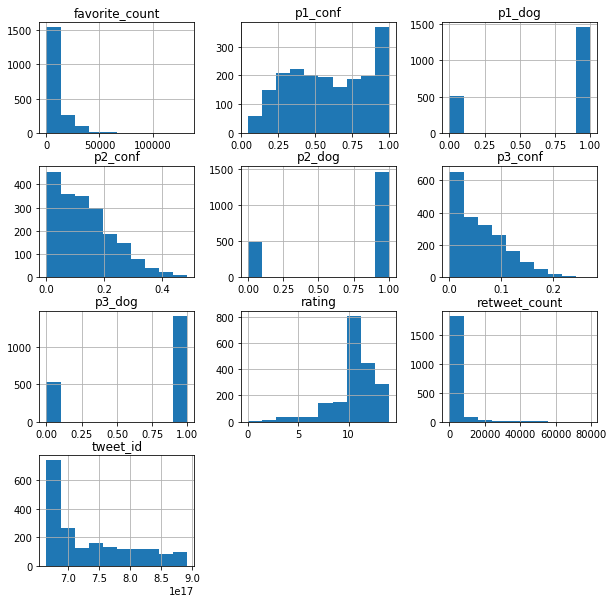

In [59]:
# Histogram
master_df_clean.hist(figsize=(10,10));

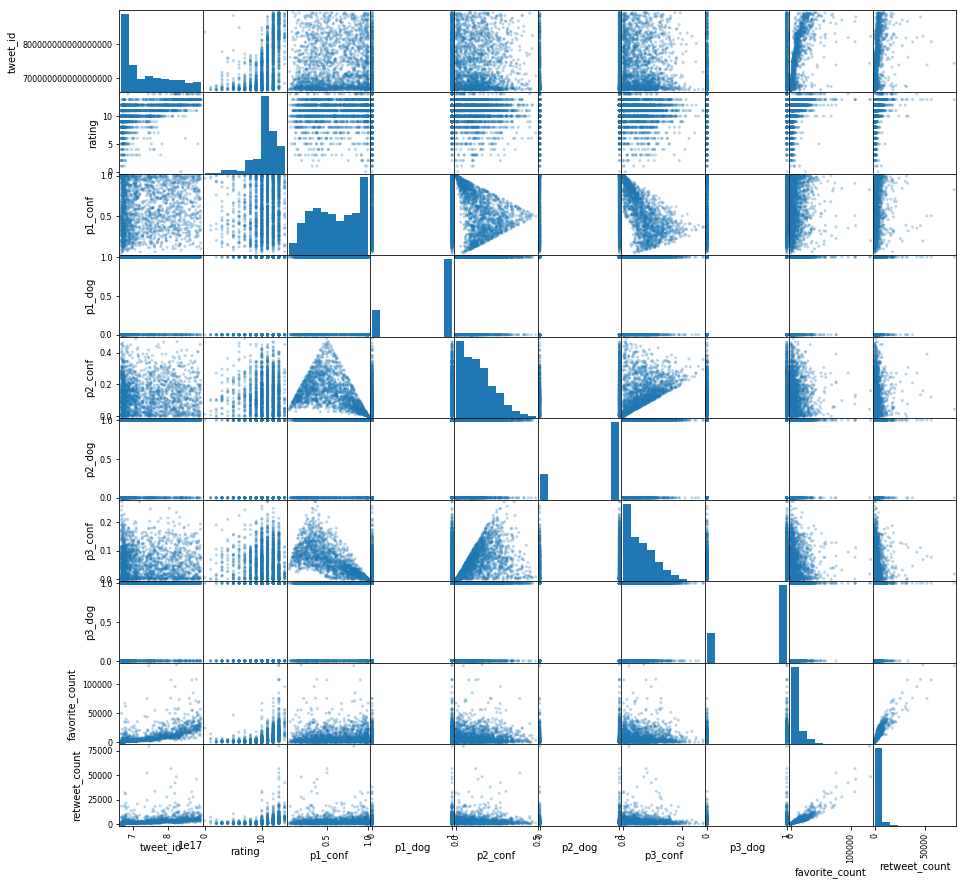

In [69]:
pd.plotting.scatter_matrix(master_df_clean, figsize=(15,15),alpha=0.3);

**_Rating vs. Dog Stage:_**

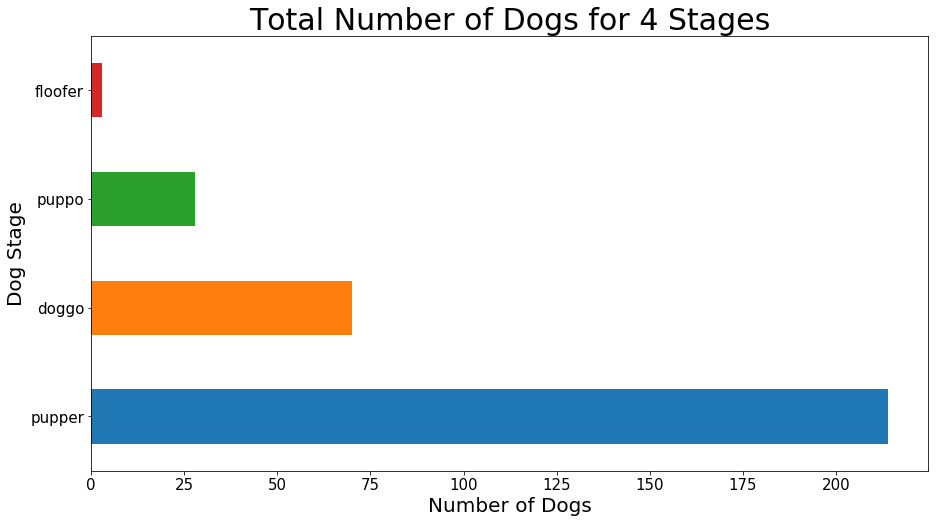

In [72]:
import matplotlib.pyplot as plt
# Plot 4 dog stages
plt.figure(figsize=(15,8))
plt.title("Total Number of Dogs for 4 Stages", size=30)
plt.ylabel("Dog Stage", size=20)
plt.xlabel("Number of Dogs", size=20)
master_df_clean.dog_stage.value_counts().plot(kind='barh', fontsize=15);

**_Rating vs. Source:_**

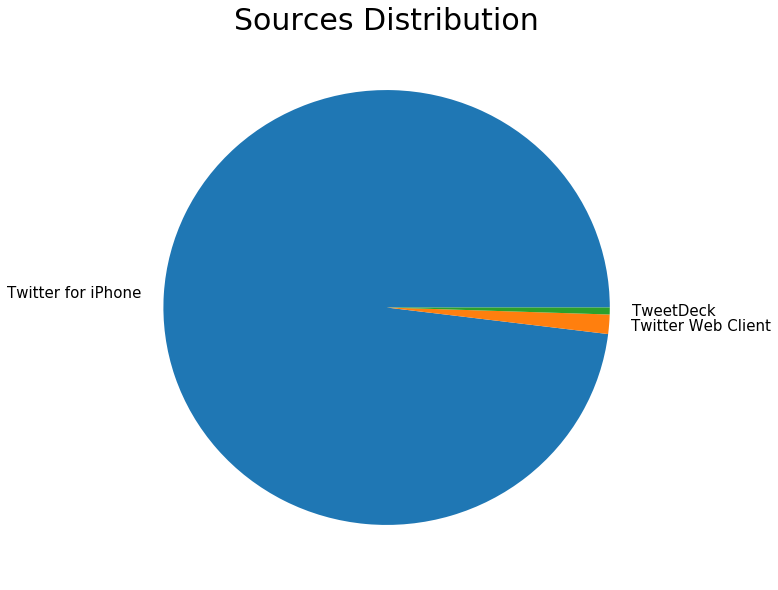

In [73]:
# Plot total counts for 3 sources in pie chart
plt.title("Sources Distribution", size=30)
master_df_clean['source'].value_counts().plot(kind='pie',figsize=(10,10),fontsize=15)
plt.ylabel('');

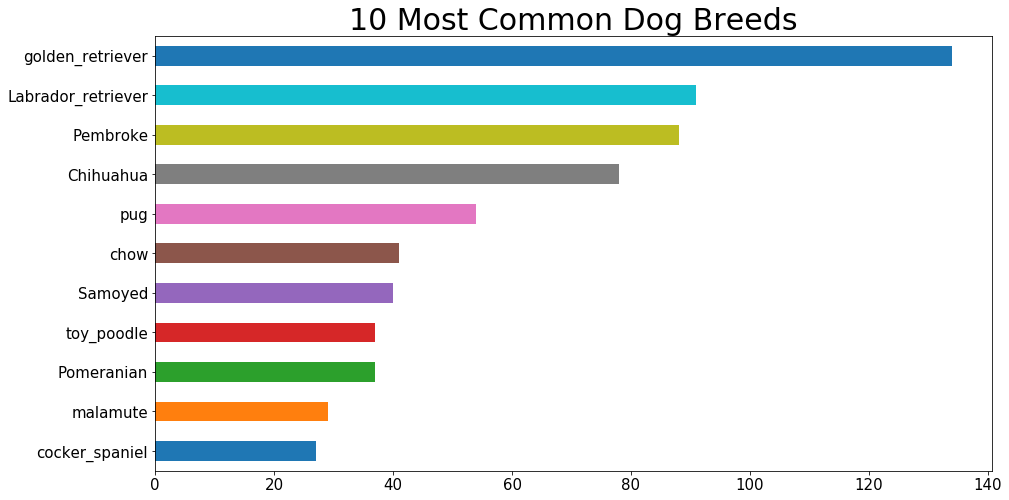

In [75]:
# Plot the 10 most common dog breeds in bar chart
plt.figure(figsize=(15,8))
plt.title("10 Most Common Dog Breeds", size=30)
master_df_clean['p1'].value_counts()[10::-1].plot(kind='barh',fontsize=15);

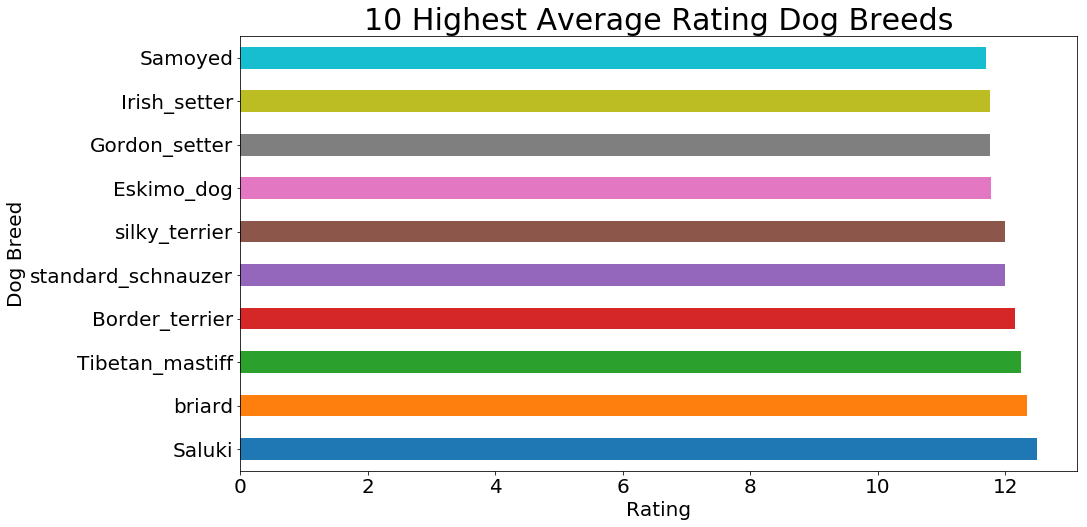

In [78]:
# Extract top 10 average rating breed
top_10_rating = master_df_clean[master_df_clean.p1.notnull()]
top_10_rating = top_10_rating[top_10_rating.p1_dog==True].groupby('p1')['rating'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(15,8))
plt.title("10 Highest Average Rating Dog Breeds", size=30)
top_10_rating.plot(kind='barh',fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Dog Breed', fontsize=20);